In [47]:
import pandas as pd

full_data = pd.read_excel('Clean_dataset/cleaned_data.xlsx')
print(full_data.head())


full_data = full_data[full_data['Caller_Company'] =='Warid'] 
#print full_data['Call_Company']
#df1 = full_data[full_data["Duration"] !='s'] 
print full_data.shape
#print df2.shape


   Caller_Number Caller_Company  Dialled_Number Dialled_Company  \
0    92301000002          Warid  923100000524.0           Warid   
4    92301000002          Warid  923470000407.0           Ufone   
5    92301000002          Warid  923310000176.0           Warid   
6    92301000002          Warid  923120000917.0           Warid   
7    92301000002          Warid  923120000917.0           Ufone   

        Calltype  Duration  Monetory_Rates  Month  Day  Hours  
0  Incoming Call        31            55.8      8    1     10  
4  Incoming Call       330           594.0      8    1     11  
5  Incoming Call        15            27.0      8    1     11  
6  Outgoing Call        24            43.2      8    1     12  
7  Incoming Call       114           205.2      8    1     12  
(67044, 10)


In [48]:

import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib as plt
import sklearn
import sklearn.linear_model as Lr
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [49]:
#full_data["Call_Company"] = pd.factorize(full_data["Call_Company"])[0]
number = LabelEncoder()
full_data['Caller_Company'] = number.fit_transform(full_data['Caller_Company'].astype('str'))

#df1["Caller_Number"] = pd.factorize(full_data["Caller_Number"])[0]
full_data['Caller_Number'] = number.fit_transform(full_data['Caller_Number'].astype('str'))


full_data['Dialled_Company'] = number.fit_transform(full_data['Dialled_Company'].astype('str'))
#full_data["Calltype"] = pd.factorize(full_data["Calltype"])[0]
full_data['Calltype'] = number.fit_transform(full_data['Calltype'].astype('str'))

#full_data["Dialled_Number"] = pd.factorize(full_data["Dialled_Number"])[0]#
full_data['Dialled_Number'] = number.fit_transform(full_data['Dialled_Number'].astype('str'))

X= full_data.drop(['Duration','Monetory_Rates'], axis= 1)


In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X, full_data['Monetory_Rates'],test_size = 0.33, random_state=5)

print X.columns
#print X_test.shape
#print Y_train

#print X_test.shape
#X_train = X_train[X_train["Duration"] !='s'] 
#X_train["Duration"].str.contains('s').sum()
#print mel_count
#print X_train

Index([u'Caller_Number', u'Caller_Company', u'Dialled_Number',
       u'Dialled_Company', u'Calltype', u'Month', u'Day', u'Hours'],
      dtype='object')


In [51]:
#X_train= X_train.reshape(-1, 1)
#Y_train= Y_train.reshape(-1, 1)
#X_test= X_test.reshape(-1, 1)
#Y_test= Y_test.reshape(-1, 1)
lm= Lr.LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print pred_test

[ 274.24619498  196.10808484   95.73276831 ...,   58.97732375  246.33181506
  278.62230875]


In [52]:
lm.score(X_train,Y_train)
#print pred_train.shape

0.023130742117390746

In [53]:


lm.score(X_test,Y_test)
#print pred_test.shape

0.02201455611158476

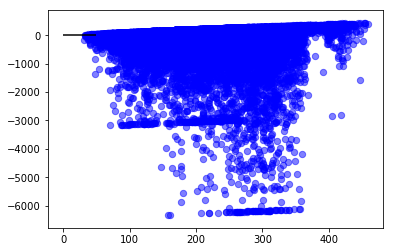

In [54]:
import matplotlib.pyplot as plt
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train,c='b',s=40, alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test,c='b',s=40, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax= 50)
plt.show()

In [55]:
pd.DataFrame(zip(full_data.columns,lm.coef_),columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,Caller_Number,3.160001e+00
1,Caller_Company,-1.244144e-14
2,Dialled_Number,-6.082020e-03
3,Dialled_Company,-2.443408e+01
4,Calltype,8.531640e+01
5,Duration,-1.838924e+01
6,Monetory_Rates,6.839049e-01
7,Month,1.143130e+00


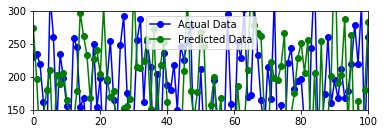

In [56]:
import matplotlib.pyplot as plt

fig= plt.figure()

#fig.subplots_adjust(bottom=0.2)

ax1 = fig.add_subplot(211)

line1=ax1.plot(pred_train,'bo-',label='Actual Data')
line2=ax1.plot(pred_test,'go-',label='Predicted Data')

ax1.set_ylim(150,300)
ax1.set_xlim(0,100)
plt.legend()
plt.show()